In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [24]:
import os
from tqdm.notebook import tqdm

import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data reading

In [25]:
train_data_dir = './Classification_data/train'
test_data_dir = './Classification_data/test'

img_width, img_height = 150, 150

classes = [c for c in os.listdir(train_data_dir) if not c.startswith('.')]
classes

['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']

forest


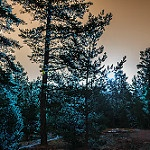

buildings


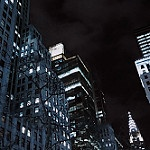

glacier


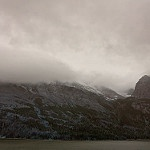

street


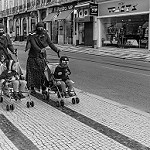

mountain


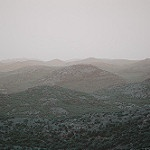

sea


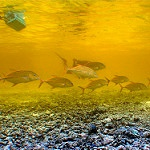

In [26]:
image_name_dict = {}
for c in classes:
    folder = os.path.join(train_data_dir, c)
    image_names = os.listdir(folder)
    image_name_dict[c] = image_names
    image = cv2.imread(os.path.join(train_data_dir, c, image_names[0]))
    print(c)
    display(Image.fromarray(image))

In [27]:
total = 0
for k, v in image_name_dict.items():
    class_items_num = len(v)
    print(k, class_items_num)
    total += class_items_num
print('total', total)

forest 2271
buildings 2191
glacier 2404
street 2382
mountain 2512
sea 2274
total 14034


# Classification

## Utils

In [28]:
def eval_clf(y_test, y_pred):
    from sklearn.metrics import (f1_score, classification_report, confusion_matrix,
                                 ConfusionMatrixDisplay)
    
    if isinstance(y_test, (pd.core.frame.DataFrame, pd.core.series.Series)):
        y_test = y_test.astype(str)
    if isinstance(y_pred, (pd.core.frame.DataFrame, pd.core.series.Series)):
        y_pred = y_pred.astype(str)
    clf_report = classification_report(y_test,
                                       y_pred, )

    print(clf_report)

    test_labels = set(np.unique(y_test))
    pred_labels = set(np.unique(y_pred))
    labels = sorted(test_labels.union(pred_labels))

    conf_matrix = confusion_matrix(y_test,
                                   y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.grid(False)
    disp.plot(ax=ax)

    return round(f1_score(y_test, y_pred, average='micro'), 2)

## Classic

### Features

#### Load

In [29]:
X_train_list = []
y_train = []
i = 0
for c in tqdm(classes, total=len(classes)):
    folder = os.path.join(train_data_dir, c)
    image_names = os.listdir(folder)
    for img_name in tqdm(image_names, total=len(image_names)):
        image = cv2.imread(os.path.join(train_data_dir, c, img_name))
        if image.shape == (150, 150, 3):
            X_train_list.append(image)
            y_train.append(c)
            i += 1
        else:
            print(os.path.join(train_data_dir, c, img_name), 'was not processed with shape', image.shape)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2271 [00:00<?, ?it/s]

./Classification_data/train/forest/14609.jpg was not processed with shape (115, 150, 3)
./Classification_data/train/forest/12108.jpg was not processed with shape (108, 150, 3)
./Classification_data/train/forest/5483.jpg was not processed with shape (136, 150, 3)
./Classification_data/train/forest/5643.jpg was not processed with shape (108, 150, 3)
./Classification_data/train/forest/15776.jpg was not processed with shape (135, 150, 3)
./Classification_data/train/forest/14315.jpg was not processed with shape (133, 150, 3)
./Classification_data/train/forest/7174.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/forest/1004.jpg was not processed with shape (113, 150, 3)


  0%|          | 0/2191 [00:00<?, ?it/s]

./Classification_data/train/buildings/5358.jpg was not processed with shape (124, 150, 3)


  0%|          | 0/2404 [00:00<?, ?it/s]

./Classification_data/train/glacier/5135.jpg was not processed with shape (111, 150, 3)
./Classification_data/train/glacier/1740.jpg was not processed with shape (134, 150, 3)
./Classification_data/train/glacier/17528.jpg was not processed with shape (142, 150, 3)
./Classification_data/train/glacier/15103.jpg was not processed with shape (149, 150, 3)
./Classification_data/train/glacier/2837.jpg was not processed with shape (76, 150, 3)
./Classification_data/train/glacier/12634.jpg was not processed with shape (111, 150, 3)
./Classification_data/train/glacier/17611.jpg was not processed with shape (123, 150, 3)
./Classification_data/train/glacier/11110.jpg was not processed with shape (105, 150, 3)
./Classification_data/train/glacier/18110.jpg was not processed with shape (102, 150, 3)
./Classification_data/train/glacier/16472.jpg was not processed with shape (143, 150, 3)
./Classification_data/train/glacier/16710.jpg was not processed with shape (146, 150, 3)
./Classification_data/tra

  0%|          | 0/2382 [00:00<?, ?it/s]

./Classification_data/train/street/13747.jpg was not processed with shape (113, 150, 3)


  0%|          | 0/2512 [00:00<?, ?it/s]

./Classification_data/train/mountain/8163.jpg was not processed with shape (147, 150, 3)
./Classification_data/train/mountain/16971.jpg was not processed with shape (103, 150, 3)
./Classification_data/train/mountain/9286.jpg was not processed with shape (131, 150, 3)
./Classification_data/train/mountain/13200.jpg was not processed with shape (135, 150, 3)
./Classification_data/train/mountain/16041.jpg was not processed with shape (144, 150, 3)
./Classification_data/train/mountain/4513.jpg was not processed with shape (100, 150, 3)
./Classification_data/train/mountain/13656.jpg was not processed with shape (123, 150, 3)
./Classification_data/train/mountain/17021.jpg was not processed with shape (136, 150, 3)
./Classification_data/train/mountain/14462.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/mountain/7400.jpg was not processed with shape (81, 150, 3)
./Classification_data/train/mountain/5171.jpg was not processed with shape (143, 150, 3)
./Classification

  0%|          | 0/2274 [00:00<?, ?it/s]

./Classification_data/train/sea/5584.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/sea/19551.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/sea/341.jpg was not processed with shape (113, 150, 3)
./Classification_data/train/sea/357.jpg was not processed with shape (140, 150, 3)


In [30]:
len(X_train_list)

13986

#### Split

In [31]:
X_train_list, X_val_list, y_train, y_val = train_test_split(X_train_list,
                                                            y_train,
                                                            stratify=y_train,
                                                            random_state=42,
                                                            test_size=0.2)

#### Plain vector

In [32]:
X_train_plain = np.stack(X_train_list)
X_train_plain.shape

(11188, 150, 150, 3)

In [33]:
X_train_plain = np.reshape(X_train_plain, (X_train_plain.shape[0], -1))
X_train_plain.shape

(11188, 67500)

In [34]:
X_val_plain = np.stack(X_val_list)
X_val_plain = np.reshape(X_val_plain, (X_val_plain.shape[0], -1))
X_val_plain.shape

(2798, 67500)

#### Histogram
https://pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/

In [35]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
    [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [36]:
extract_color_histogram(image).shape

(512,)

In [37]:
X_train_hist = [
    extract_color_histogram(img)
    for img in tqdm(X_train_list, total=len(X_train_list))
]

X_train_hist = np.stack(X_train_hist)
X_train_hist.shape

  0%|          | 0/11188 [00:00<?, ?it/s]

(11188, 512)

In [38]:
X_val_hist = [
    extract_color_histogram(img)
    for img in tqdm(X_val_list, total=len(X_val_list))
]

X_val_hist = np.stack(X_val_hist)
X_val_hist.shape

  0%|          | 0/2798 [00:00<?, ?it/s]

(2798, 512)

### KNN
https://medium.com/swlh/image-classification-with-k-nearest-neighbours-51b3a289280
Play with params? neighbours, metric

In [41]:
from sklearn.neighbors import KNeighborsClassifier

#### Plain

              precision    recall  f1-score   support

   buildings       0.93      0.50      0.65      1732
      forest       0.78      0.74      0.76      1805
     glacier       0.61      0.66      0.64      1925
    mountain       0.46      0.83      0.59      1975
         sea       0.48      0.64      0.55      1846
      street       0.96      0.24      0.38      1905

    accuracy                           0.60     11188
   macro avg       0.70      0.60      0.59     11188
weighted avg       0.70      0.60      0.59     11188



0.6

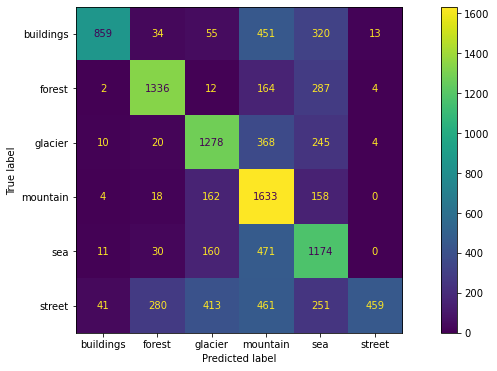

In [27]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_plain, y_train)
y_train_pred = neigh.predict(X_train_plain)
eval_clf(y_test=y_train, y_pred=y_train_pred)

              precision    recall  f1-score   support

   buildings       0.58      0.08      0.14       458
      forest       0.63      0.46      0.53       458
     glacier       0.42      0.41      0.41       462
    mountain       0.35      0.72      0.47       520
         sea       0.22      0.42      0.29       424
      street       0.84      0.13      0.23       476

    accuracy                           0.38      2798
   macro avg       0.51      0.37      0.35      2798
weighted avg       0.51      0.38      0.35      2798



0.38

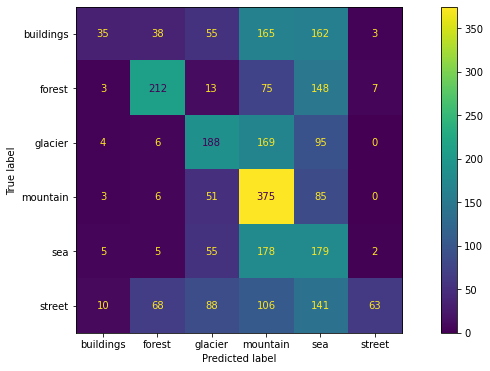

In [26]:
y_val_pred = neigh.predict(X_val_plain)
eval_clf(y_test=y_val, y_pred=y_val_pred)

reference buildings


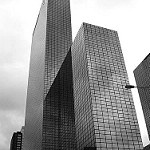

dist 17249.96921736384 class sea


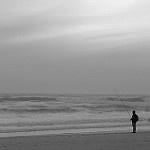

dist 17320.570660344885 class buildings


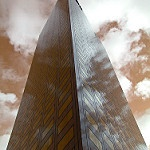

dist 17420.37413490307 class mountain


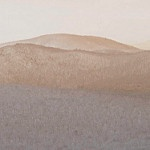

dist 17425.952513420896 class mountain


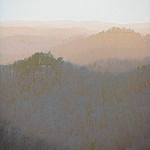

dist 17467.633211170883 class mountain


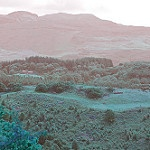

In [31]:
val_idx = 10
reference = X_val_plain[[val_idx]]
neigh_dist, neigh_ind = neigh.kneighbors(reference, n_neighbors=5)
neigh_dist = neigh_dist[0]
neigh_ind = neigh_ind[0]

print('reference', y_val[val_idx])
display(Image.fromarray(X_val_list[val_idx]))
for idx, dist in zip(neigh_ind, neigh_dist):
    print('dist', dist, 'class', y_train[idx])
    display(Image.fromarray(X_train_list[idx]))

#### Hist

              precision    recall  f1-score   support

   buildings       0.50      0.79      0.62      1732
      forest       0.78      0.92      0.84      1805
     glacier       0.62      0.77      0.69      1925
    mountain       0.80      0.51      0.62      1975
         sea       0.79      0.49      0.60      1846
      street       0.78      0.64      0.70      1905

    accuracy                           0.68     11188
   macro avg       0.71      0.69      0.68     11188
weighted avg       0.72      0.68      0.68     11188



0.68

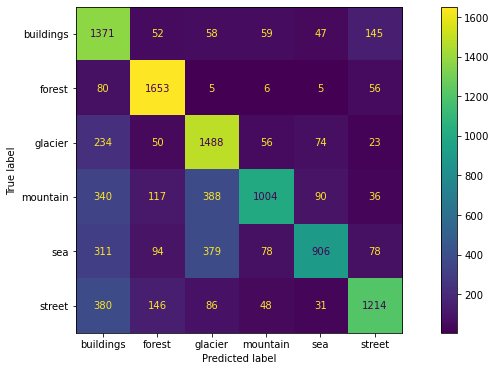

In [42]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_hist, y_train)
y_train_pred = neigh.predict(X_train_hist)
eval_clf(y_test=y_train, y_pred=y_train_pred)

              precision    recall  f1-score   support

   buildings       0.29      0.45      0.35       458
      forest       0.69      0.85      0.76       458
     glacier       0.43      0.56      0.49       462
    mountain       0.47      0.24      0.32       520
         sea       0.42      0.26      0.32       424
      street       0.53      0.43      0.47       476

    accuracy                           0.46      2798
   macro avg       0.47      0.47      0.45      2798
weighted avg       0.47      0.46      0.45      2798



0.46

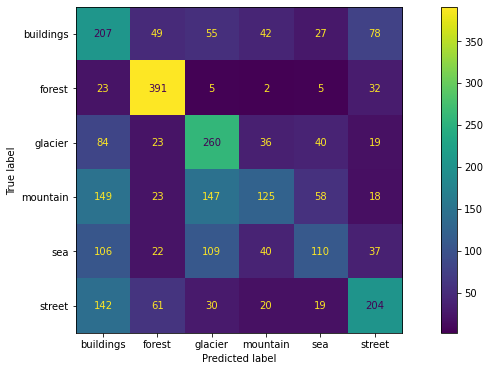

In [43]:
y_val_pred = neigh.predict(X_val_hist)
eval_clf(y_test=y_val, y_pred=y_val_pred)

reference glacier


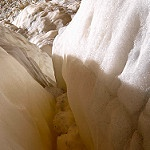

dist 0.5834561769247257 class mountain


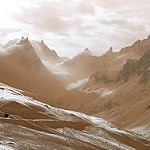

dist 0.6468423733799108 class mountain


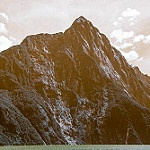

dist 0.6650135634767171 class sea


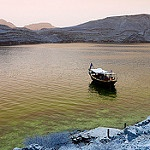

dist 0.7379049724841951 class glacier


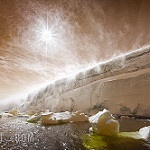

dist 0.750292204519228 class glacier


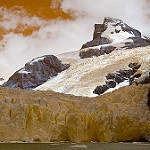

In [49]:
val_idx = 200
reference = X_val_hist[[val_idx]]
neigh_dist, neigh_ind = neigh.kneighbors(reference, n_neighbors=5)
neigh_dist = neigh_dist[0]
neigh_ind = neigh_ind[0]

print('reference', y_val[val_idx])
display(Image.fromarray(X_val_list[val_idx]))
for idx, dist in zip(neigh_ind, neigh_dist):
    print('dist', dist, 'class', y_train[idx])
    display(Image.fromarray(X_train_list[idx]))

### SVM

In [17]:
from sklearn.svm import SVC

#### Plain
infinite

In [18]:
# svc = SVC()
# svc.fit(X_train_plain, y_train)
# y_train_pred = svc.predict(X_train_plain)
# eval_clf(y_test=y_train, y_pred=y_train_pred)

In [19]:
# y_val_pred = svc.predict(X_val_plain)
# eval_clf(y_test=y_val, y_pred=y_val_pred)

#### Hist

              precision    recall  f1-score   support

   buildings       0.72      0.56      0.63      1732
      forest       0.93      0.87      0.90      1805
     glacier       0.69      0.80      0.74      1925
    mountain       0.73      0.70      0.72      1975
         sea       0.73      0.68      0.70      1846
      street       0.67      0.80      0.73      1905

    accuracy                           0.74     11188
   macro avg       0.74      0.73      0.74     11188
weighted avg       0.74      0.74      0.74     11188



0.74

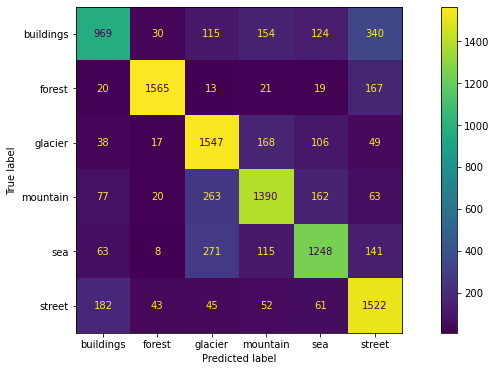

In [21]:
svc = SVC()
svc.fit(X_train_hist, y_train)
y_train_pred = svc.predict(X_train_hist)
eval_clf(y_test=y_train, y_pred=y_train_pred)

              precision    recall  f1-score   support

   buildings       0.46      0.34      0.39       458
      forest       0.88      0.82      0.85       458
     glacier       0.56      0.68      0.62       462
    mountain       0.59      0.54      0.56       520
         sea       0.48      0.47      0.47       424
      street       0.51      0.62      0.56       476

    accuracy                           0.58      2798
   macro avg       0.58      0.58      0.58      2798
weighted avg       0.58      0.58      0.58      2798



0.58

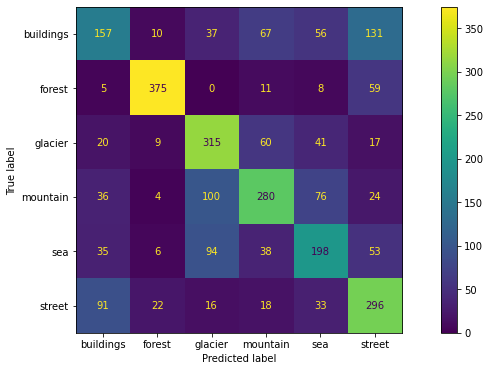

In [22]:
y_val_pred = svc.predict(X_val_hist)
eval_clf(y_test=y_val, y_pred=y_val_pred)

### Lin

## CNN+MLP with your own architecture

1. Frameworks?
    * TF Lite - optimizations for CPU (for Intel use openVINO)
    * TensorRT - optimizations for specific NVIDIA GPU
    * Torch -> ONNX -> TF Lite
    * NVIDIA Triton and DeepStream for optimized inference https://www.reddit.com/r/computervision/comments/p1xasr/nvidia_deepstream_triton_server_jetson_nano/
2. Wrappers like lightning or catalyst? Вкусовщина, but it's always safer to use pure torch
3. Best practices? Loaders (batch)? 

torch-vision?

### Torch
https://saptarshidatta.in/2021/06/13/mlp_cnn_cifar100.html

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [ ]:
class CNN_network(nn.Module):
    def __init__(self):
        super(CNN_network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)

        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.out = nn.Linear(in_features=84, out_features=20)

    def forward(self, t):
        #Layer 1
        t = t
        #Layer 2
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)#output shape : (6,14,14)
        #Layer 3
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)#output shape : (16,5,5)
        #Layer 4
        t = t.reshape(-1, 16*5*5)
        t = self.fc1(t)
        t = F.relu(t)#output shape : (1,120)
        #Layer 5
        t = self.fc2(t)
        t = F.relu(t)#output shape : (1, 84)
        #Layer 6/ Output Layer
        t = self.out(t)#output shape : (1, 20)

        return t

In [ ]:
def train_nn(model, train_loader, optimizer):
    print('>>> Training Start >>>')
    for epoch in range(30):
    total_loss = 0
    total_correct = 0
    for batch in train_loader:
        images, labels = batch
        predictions = model(images)
        loss = F.cross_entropy(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss = total_loss + loss.item()
        total_correct = total_correct + predictions.argmax(dim=1).eq(labels).sum().item()

    print('epoch:', epoch, "total_correct:", total_correct, "loss:", total_loss)

    print('>>> Training Complete >>>')

In [ ]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
        preds = model(images)
        all_preds = torch.cat((all_preds, preds) ,dim=0)

    return all_preds

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum = 0.9)
train_nn(model, train_loader, optimizer)
all_preds = get_all_preds(model, test_loader)

## Finetuned CNN